<a href="https://colab.research.google.com/github/RatanakamonS/DADS5001-PART1/blob/main/HW/HW4_6620422002_Ratanakamon_Somklang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file is no longer focus on how to use pandas to plot each type of graph. Instead, this file discusses about <u>subplot and text-and-arrow annotation</u> together with the practice at the end.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Practice

Use our old pokemon dataset to do the following data visualization.

1. (1.5 points) Plot the number of each pokemon type.

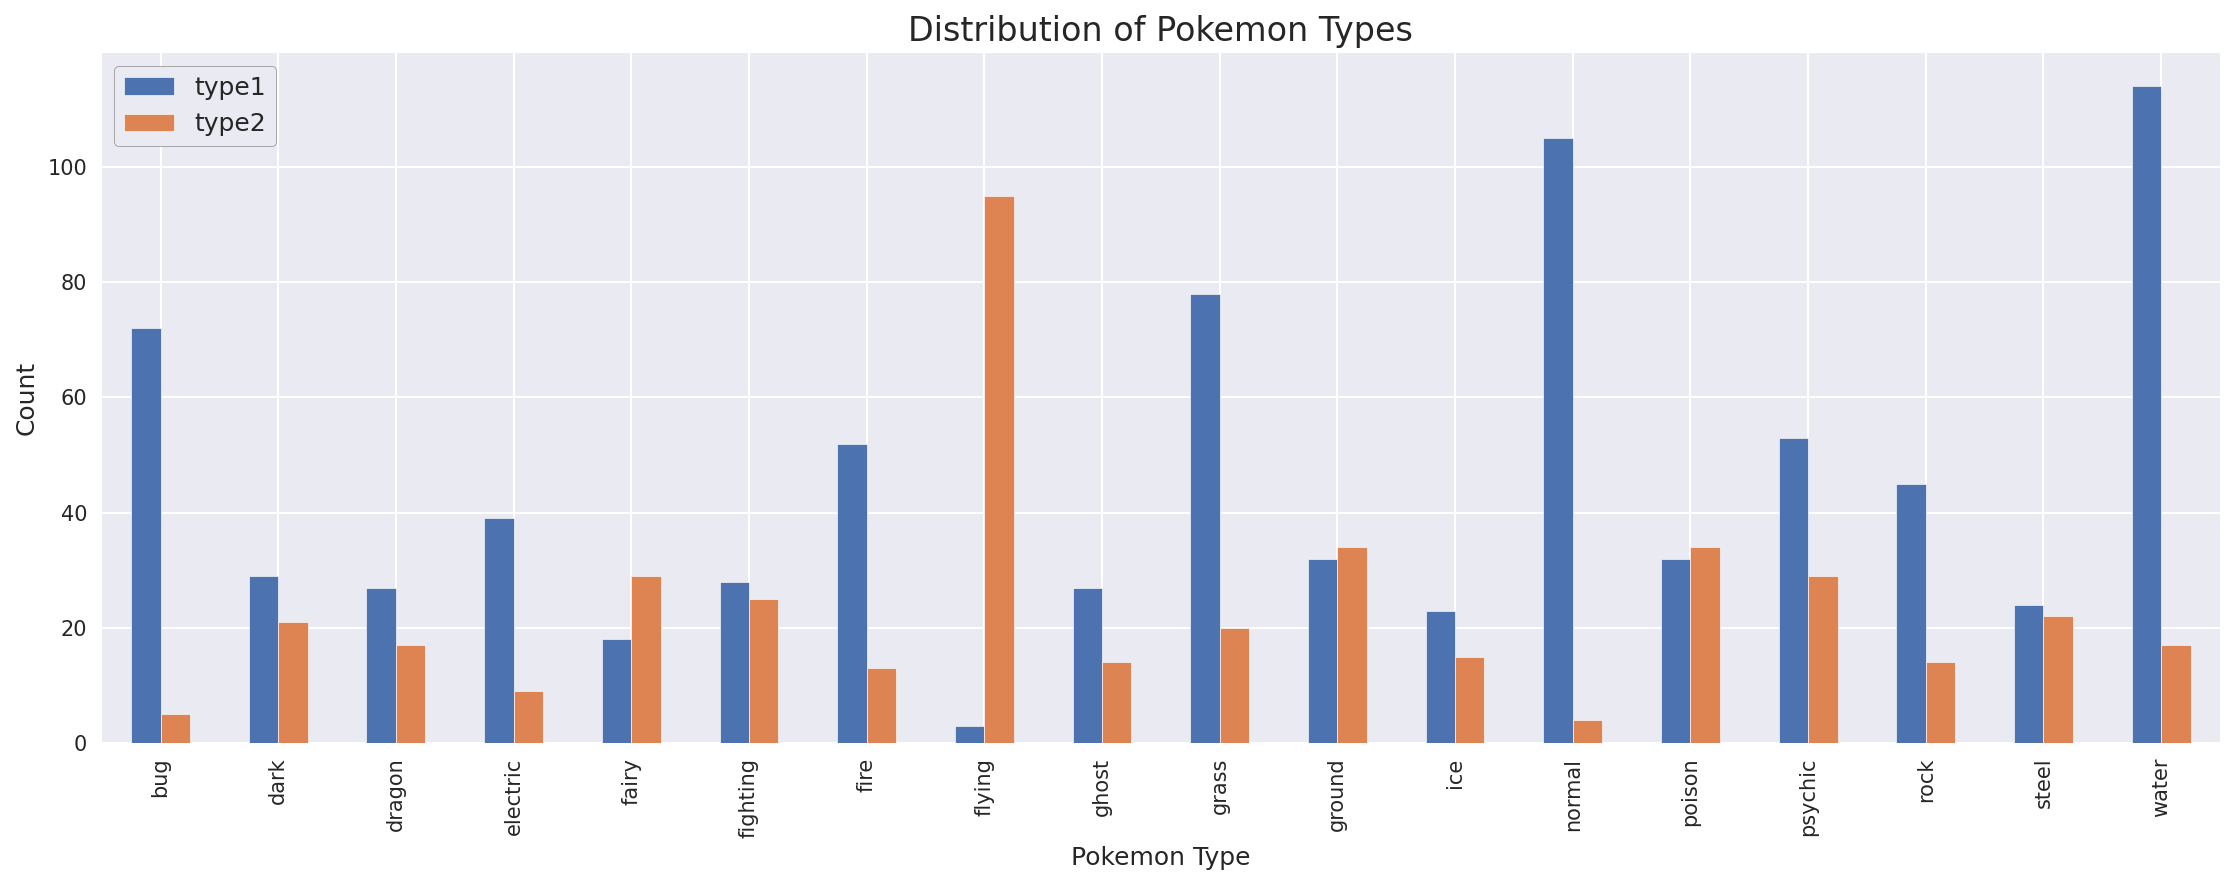

In [42]:
pokemon_df = pd.read_csv("https://raw.githubusercontent.com/RatanakamonS/DADS5001-PART1/refs/heads/main/week5/pokemon%20(1).csv")
type1 = pokemon_df['type1'].value_counts() #นับแต่ละกลุ่ม type ใน feature: type1
type2 = pokemon_df['type2'].value_counts() #นับแต่ละกลุ่ม type ใน feature: type2
types_df = pd.DataFrame({'type1': type1, 'type2': type2}).fillna(0) #2df มารวมกัน ค่าว่างให้ใส่ 0
types_df = types_df.sort_index() #เรียงชื่อ type ตามตัวอักษร
plt.figure(figsize=(15,6),dpi=150) #วาดช่องกริด 15แถว 6คอลัมน์ และdpi คือความชัดกราฟ
ax = plt.gca() #ใช้เพื่อดึง Axes ของกราฟที่เพิ่งสร้าง แล้วใช้ ax เพื่อปรับแต่งกราฟ เช่น เพิ่มชื่อแกน และชื่อกราฟ

sns.set_style("darkgrid") #สีของกริด
types_df.plot(kind='bar', ax=ax, color={'type1': '#4C72B0', 'type2': '#DD8452'}) #plot bar และใส่สี

plt.title('Distribution of Pokemon Types', fontsize=16) #ชื่อกราฟ
plt.xlabel('Pokemon Type', fontsize=12) #ชื่อข้อมูลแกน x
plt.ylabel('Count', fontsize=12) #ชื่อข้อมูลแกน y
plt.legend(['type1', 'type2'], frameon=True, fancybox=True, framealpha=1, edgecolor='gray', fontsize=12) #นิยามชุดข้อมูล2df และปรับแต่ง

plt.tight_layout() #จัดการพื้นที่ว่างในกราฟ ให้ดูดีขึ้น
plt.show() #display

2. (1.5 points) For pokemons whose type1 is fire, water, or bug, create one figure (with several subplots) to conclude their histograms of hp, attack, and defense.

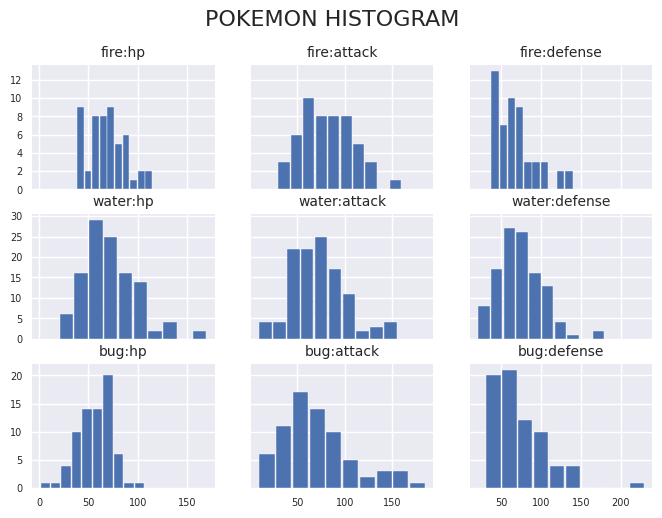

In [43]:
pokemon_df = pd.read_csv("https://raw.githubusercontent.com/RatanakamonS/DADS5001-PART1/refs/heads/main/week5/pokemon%20(1).csv")
#สร้าง dataframe ของ ชุดข้อมูลที่ต้องการใช้ plot โดยเอา fire, water, จาก Feature:type1 และข้อมูล Feature: 'hp','attack','defense
df_type = pokemon_df.loc[(pokemon_df['type1'] == 'fire') | (pokemon_df['type1'] == 'water') | (pokemon_df['type1'] == 'bug'),['type1','hp','attack','defense']]

fig, ax = plt.subplots(3,3,sharex='col',sharey='row') #สร้าง fig 3 รูป
fig.suptitle('POKEMON HISTOGRAM', fontsize=16) #ชื่อรูปกราฟ ด้านบนสุด
type1 = ['fire','water','bug'] #กำหนดค่า type1 ที่ต้องการ
stats = ['hp', 'attack', 'defense'] #ค่า performance โปเกม่อน
for i, t in enumerate(type1): #วนลูปด้วยค่า type1
    for j, s in enumerate(stats): #วนลูปด้วยค่า stats
        df_a = df_type.loc[df_type['type1'] == t, [s]]

        ax[i,j].set_title(f"{t}:{s}", fontsize=10)
        ax[i,j].hist(df_a, bins=10, rwidth=0.90) #bins=จำนวนกราฟแท่งของ histogarm, rwidth=ความกว้างของ histogarm
        if t == 'fire':
            step = 2 #เพิ่มช่วง step แกน y
        else:
            step = 5
        #y_max คือ ค่าสูงสุดแกน y กราฟย่อยที่ตำแหน่ง [i,j] get_ylim() จะคืนค่าขอบเขตของแกน y เป็นtuple(ค่าต่ำสุด, ค่าสูงสุด) และจะเลือกค่าที่ 1 (ค่าสูงสุด) โดยใช้ [1]
        y_max = ax[i,j].get_ylim()[1]
        #การกำหนดจุดบอกระยะ (ticks) บนแกน y range(0, int(y_max)+1, step) สร้างลำดับตั้งแต่ 0 ถึงค่าสูงสุดของ y step คือระยะห่างระหว่างแต่ละจุดบอกระยะ
        ax[i,j].set_yticks(range(0, int(y_max)+1, step))
        ax[i,j].set_ylabel('') #ตั้งชื่อแกน y เป็นสตริงว่าง (ในที่นี้คือการลบชื่อแกน y ออกจากทุกกราฟย่อยในตำแหน่งที่กำหนด)
        ax[i,j].tick_params(axis='y', labelsize= 7) #ระยะบนแกน y
        ax[i,j].tick_params(axis='x', labelsize= 7) #ระยะบนแกน x